In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_mathbert.xlsx to training_mathbert.xlsx


In [ ]:
import pandas as pd
import io
import numpy as np
data = pd.read_excel('training_mathbert.xlsx')
df= pd.DataFrame(data)

def calc_meanClass(column_name, value):
  output_value = []
  for i in range(len(column_name)):
    if column_name.iloc[i] == value:
      output_value.append(df["output"].iloc[i])
  mean = np.mean(output_value)
  return mean

def calc_spreadClass(column_name, value):
  output_value = []
  for i in range(len(column_name)):
    if column_name.iloc[i] == value:
      output_value.append(df["output"].iloc[i])
  stand = np.std(output_value)
  return stand
class_col = df["class(0/1)"]
mean1 = calc_meanClass(class_col,0)
mean2 = calc_meanClass(class_col,1)
print("Mean of incorrect class:", round(mean1,5))
print("Mean of correct class:", round(mean2,5))

spread1 = calc_spreadClass(class_col,0)
spread2 = calc_spreadClass(class_col,1)
print("Spread of incorrect class:", round(spread1,5))
print("Spread of correct class:", round(spread2,5))

distance = np.linalg.norm(mean1 - mean2)
print("Distance between mean vectors:", round(distance, 5))

Mean of incorrect class: 2.58226
Mean of correct class: 4.48965
Spread of incorrect class: 0.90851
Spread of correct class: 0.35891
Distance between mean vectors: 1.90738


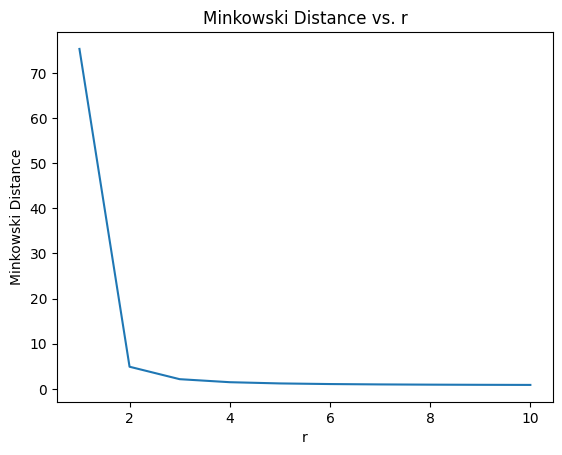

In [ ]:
import matplotlib.pyplot as plt
def minkowski_distance(x, y, r):
    return np.power(np.sum(np.power(np.abs(x - y), r)), 1/r)

def show_plot(dist, r_values):
  plt.plot(r_values, dist)
  plt.xlabel('r')
  plt.ylabel('Minkowski Distance')
  plt.title('Minkowski Distance vs. r')

vector1 = np.array(df.loc[0, 'embed_0':'embed_383'])
vector2 = np.array(df.loc[1, 'embed_0':'embed_383'])
r_values = range(1,11)
m_distance = []
for r in r_values:
    dist = minkowski_distance(vector1, vector2, r)
    m_distance.append(dist)

show_plot(m_distance,r_values)

Accuracy on test set for k=3 is: 0.7522123893805309


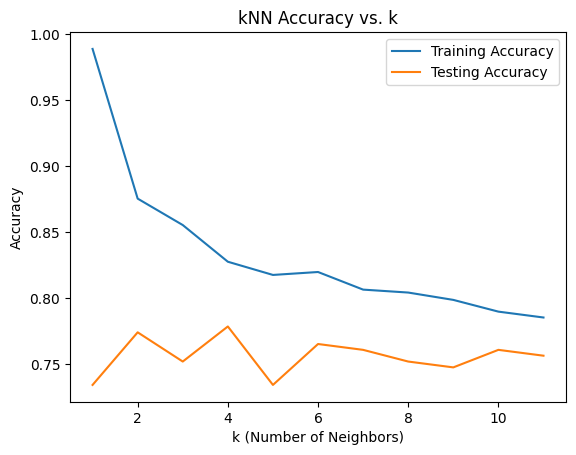

Performance on Training Data:
Confusion Matrix:
 [[563  69]
 [124 144]]
Accuracy: 0.7855555555555556
Precision: 0.676056338028169
Recall: 0.5373134328358209
F1-Score: 0.5987525987525988
Performance on Testing Data:
Confusion Matrix:
 [[146  22]
 [ 33  25]]
Accuracy: 0.7566371681415929
Precision: 0.5319148936170213
Recall: 0.43103448275862066
F1-Score: 0.4761904761904762

Model seems to be regular fitting.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

data = pd.read_excel('training_mathbert.xlsx')
df = pd.DataFrame(data)


X = df.loc[:, 'embed_0':'embed_383'].values
y = df['class(0/1)'].values

# Splittin the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
# Train the classifier using the training set
neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)
print("Accuracy on test set for k=3 is:", accuracy)

y_pred = neigh.predict(X_test)
test_vect = X_test[0]
predicted_class = neigh.predict([test_vect])

train_accuracies = []
test_accuracies = []
k_values = range(1, 12)
for k in k_values:
    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
#accuracy graph
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy vs. k')
plt.legend()
plt.show()
# performance on training data
print("Performance on Training Data:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-Score:", f1_score(y_train, y_train_pred))

# performance on testing data
print("Performance on Testing Data:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
if accuracy_score(y_train, y_train_pred) > 0.9 and accuracy_score(y_test, y_test_pred) < 0.8:
    print("\nModel is likely overfitting.")
elif accuracy_score(y_train, y_train_pred) < 0.7 :
    print("\nModel is likely underfitting.")
else:
    print("\nModel seems to be regular fitting.")
